### Теоретические сведения

<!-- #region -->
Для решения задачи одномерной регрессии удобно использовать универсальный пайплайн предварительной обработки данных. 
К имеющемусяя шаблонному коду необходимо добавить код для обучения модели, интерпретации и визуализации результатов.
Линейная регрессия – метод восстановления зависимости между двумя переменными. 
Пусть задана модель регрессии – параметрическое семейство функций $𝑔(x, \alpha)$, где $\alpha \in ℝ^p$  – вектор параметров модели. 
Определим функционал качества аппроксимации целевой зависимости на выборке $𝑋^ℓ^ как сумму квадратов ошибок

\begin{equation}
\label{1}\tag{1}
Q(\alpha, X^l) = \sum\limits_{i=1}^{l}(g(x_i, \alpha) - y_i)^2.
\end{equation}

Обучение по методу наименьших квадратов (МНК) состоит в том, чтобы найти вектор параметров 𝛼∗, при котором достигается минимум среднего
квадрата ошибки на заданной обучающей выборке $𝑋^l$:

\begin{equation}
\label{2}\tag{2}
\alpha^{*} = \arg\min\limits_{\alpha \in  ℝ^p} Q(\alpha, X^l).
\end{equation}

Стандартный способ решения этой оптимизационной задачи – воспользоваться необходимым условием минимума. 
Если функция $𝑔(x, \alpha)$ достаточное число раз дифференцируема по $\alpha$, то в точке минимума выполняется система $𝑝$ уравнений относительно $𝑝$ неизвестных

\begin{equation}
\label{3}\tag{3}
\cfrac{\partial Q}{\partial \alpha}(\alpha, X^l) = 2 \sum\limits_{i=1}^{l} (g(x_i, \alpha) - y_i)\cfrac{\partial g}{\partial \alpha} (x_i, \alpha) = 0.
\end{equation}


С использованием библиотек машинного обучения формулы (1) – (2) можно реализовать автоматически, но следует понимать, что конкретно
реализует каждый метод


<!-- #endregion -->

### Методика и порядок выполнения работы
Перед выполнением индивидуального задания рекомендуется выполнить все пункты учебной задачи.


### Учебная задача

В рамках учебной задачи необходимо построить пайплайн, реализующий решение задачи линейной одномерной регрессии.


#### Подключение библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#### Загрузка данных и разделение на матрицу признаков и зависимую переменную

dataset = pd.read_csv('./datasets/Salary_Data.csv')
dataset.head()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])


Матрица признаков
[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]]
Зависимая переменная
[39343. 46205. 37731. 43525. 39891.]


In [3]:
#### Обработка пропущенных значений (если требуется)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X[:, :])
X_without_nan = X.copy()
X_without_nan[:, :] = imputer.transform(X[:, :])
X_without_nan

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [4]:
#### Разделение выборки на тестовую и тренировочную

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0) 




In [11]:
#### Обучение линейной модели регрессии

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)



LinearRegression()

[ 41056.25705466 123597.70938378  65443.50433372  63567.56223533
 116093.94099022 108590.17259667 117031.91203942  64505.53328452]


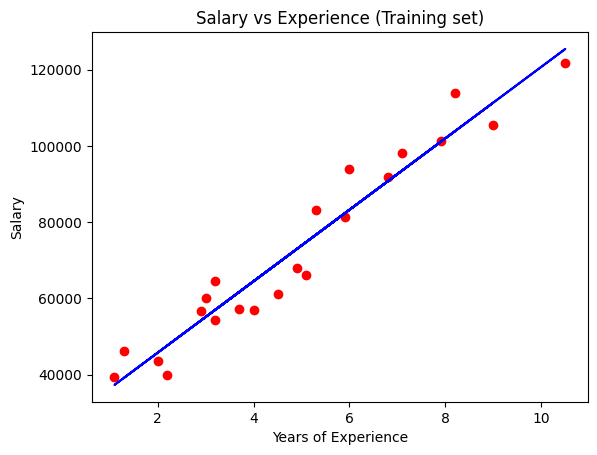

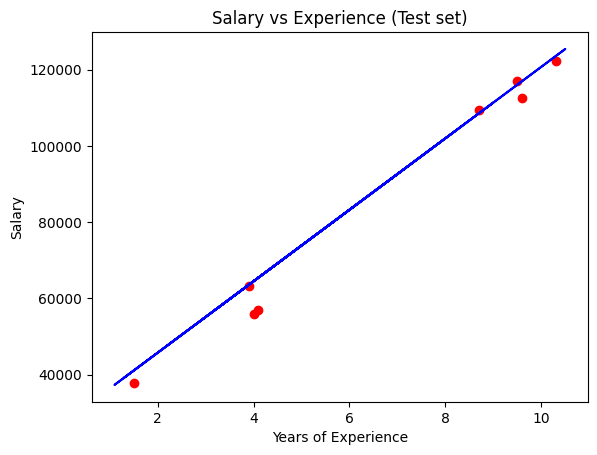

In [7]:
#### Предсказание, обработка и визуализация результатов

y_pred = regressor.predict(X_test)
print(y_pred)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()



In [8]:
#### Использование модели
#### Оптимальные параметры определены, можно использовать модель


Years = [[4.5]]

regressor.predict(Years)




array([69195.38853049])

In [9]:
#### Параметры модели

a = regressor.coef_
b = regressor.intercept_

In [10]:

# Можно использовать и так
Year = 4.5


Salary  = a * Year + b 
Salary



array([69195.38853049])

### Индивидуальное задание

1. Подберите набор данных на ресурсах [2, 3] и согласуйте свой выбор с преподавателем и другими студентами группы, так
как работа над одинаковыми наборами данных недопустима.

2. Выполните построение модели классификации на основе линейной регрессии. В ходе решения задачи необходимо решить следующие подзадачи:
 


### Содержание отчета и его форма

Отчет по лабораторной работе должен содержать:

1. Номер и название лабораторной работы; задачи лабораторной работы.

2. Реализация каждого пункта подраздела «Индивидуальное задание» с приведением исходного кода программы, диаграмм и графиков для визуализации данных.

3. Ответы на контрольные вопросы.

4. Листинг программного кода с комментариями, показывающие порядок выполнения лабораторной работы, и результаты, полученные в ходе её выполнения.


### Контрольные вопросы

1. Почему при реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков?
2. Почему при реализации модели линейной регрессии в качестве функции потерь используется квадратичное отклонение, а не модуль отклонения?
3. Что именно реализовано в методе fit(X, y) класса LinearRegression?
4. Поясните назначение метода predict класса LinearRegression.
5. По какой подвыборке необходимо оценивать точность модели машинного обучения: тестовой или тренировочной?


### Список литературы

1. Дж. Плас: Python для сложных задач. Наука о данных и машинное обучение. Питер.,2018, 576 с.

2. [Репозиторий наборов данных для машинного обучения (Центр машинного обучения и интеллектуальных систем)](https://archive.ics.uci.edu/datasets)

3. [Репозиторий наборов данных для машинного обучения (Kaggle)](https://www.kaggle.com/datasets/)
